In [1]:
pip install xgboost lightgbm scikit-learn pandas numpy matplotlib seaborn joblib

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.0/124.9 MB 388.9 kB/s eta 0:05:22
   ---------------------------------------- 0.1/124.9 MB 491.5 kB/s eta 0:04:14
   ---------------------------------------- 0.1/124.9 MB 774.0 kB/s eta 0:02:42
   ---------------------------------------- 0.2/124.9 MB 697.2 kB/s eta 0:02:59
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:50
   ---------------------------------------- 0.4/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.6/124.9 MB 1.3 MB/s eta 0:01:34
   ---------------------------------------- 0.6/124.9 MB 1.4 MB/s eta 0:01:31
   ---------------------------------------- 0.8/124.9 MB 1.7 M

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as XGBoost
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\LADY FEJ\cleanforcastdata.csv")
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Feature Selection
features = ['price', 'inventory_level', 'marketing_spend', 'competitor_price',
           'website_traffic', 'seasonal_factor', 'market_sentiment',
           'economic_indicator', 'is_holiday']
target = 'sales'

X = df[features]
y = df[target]

In [7]:
# Time-based split for validation
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Model Development
# 1. XGBoost Model
xgb_model = XGBoost.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

# 2. LightGBM Model
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)

lgb_model.fit(X_train_scaled, y_train)
lgb_predictions = lgb_model.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 567, number of used features: 9
[LightGBM] [Info] Start training from score 551.797178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [24]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance Metrics:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.4f}\n")
    
    return rmse, mae, r2

In [26]:
# Evaluate both models
xgb_metrics = evaluate_model(y_test, xgb_predictions, "XGBoost")
lgb_metrics = evaluate_model(y_test, lgb_predictions, "LightGBM")


XGBoost Performance Metrics:
RMSE: 176.67
MAE: 143.14
R2 Score: 0.2667

LightGBM Performance Metrics:
RMSE: 167.49
MAE: 136.94
R2 Score: 0.3409



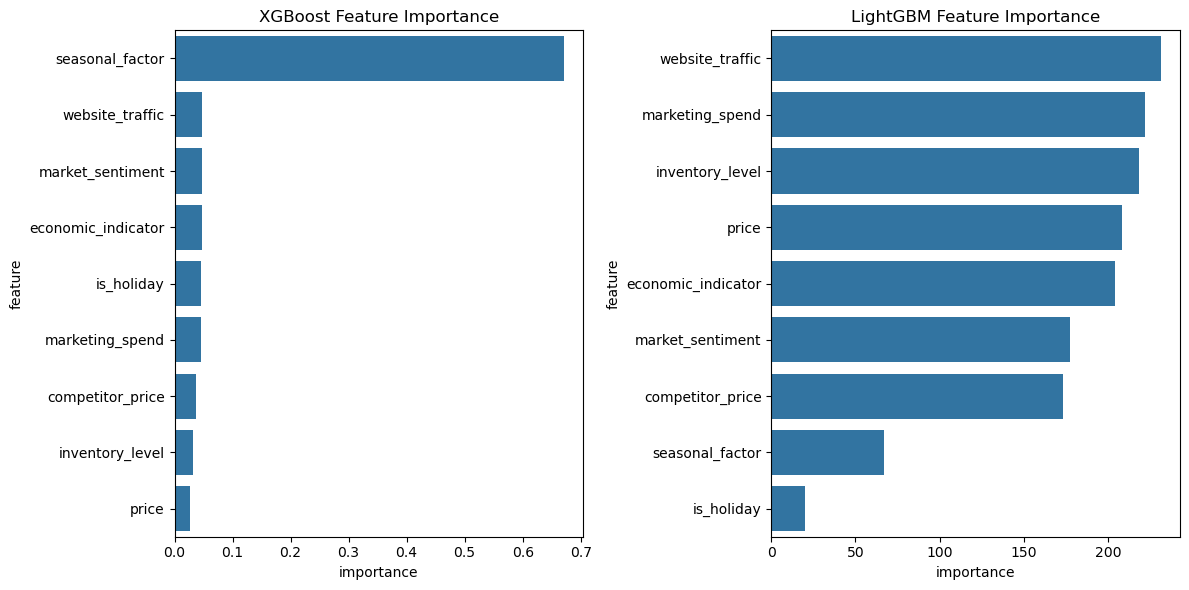

In [28]:
# Feature Importance Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
xgb_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=xgb_importance, x='importance', y='feature')
plt.title('XGBoost Feature Importance')

plt.subplot(1, 2, 2)
lgb_importance = pd.DataFrame({
    'feature': features,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=lgb_importance, x='importance', y='feature')
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

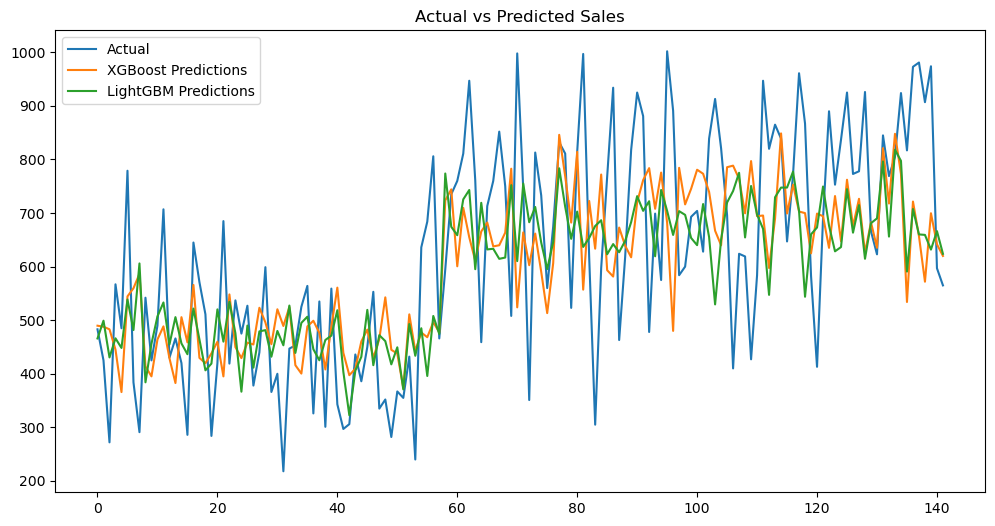

In [30]:
# Prediction vs Actual Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(xgb_predictions, label='XGBoost Predictions')
plt.plot(lgb_predictions, label='LightGBM Predictions')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


In [34]:
# Save models
import joblib
joblib.dump(xgb_model, 'xgb_demand_forecast_model.pkl')
joblib.dump(lgb_model, 'lgb_demand_forecast_model.pkl')

['lgb_demand_forecast_model.pkl']

In [36]:
# Generate forecast for next 30 days
last_date = df['date'].max()
future_dates = pd.date_range(start=last_date, periods=31)[1:]
future_df = pd.DataFrame({'date': future_dates})

In [38]:
# Prepare future features 
future_features = X_test.tail(len(future_dates)).reset_index(drop=True)
future_features_scaled = scaler.transform(future_features)

In [40]:
# Generate predictions
future_predictions_xgb = xgb_model.predict(future_features_scaled)
future_predictions_lgb = lgb_model.predict(future_features_scaled)


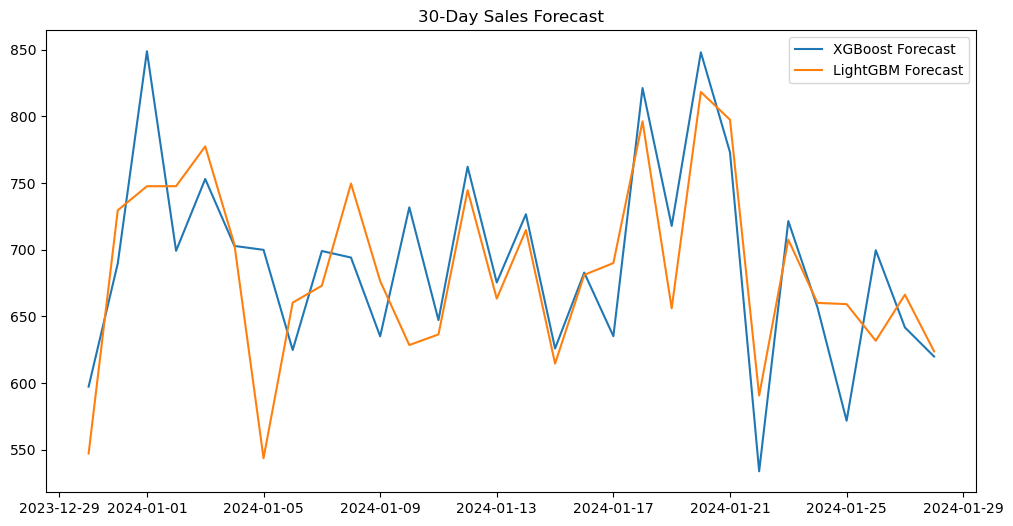

In [42]:
# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions_xgb, label='XGBoost Forecast')
plt.plot(future_dates, future_predictions_lgb, label='LightGBM Forecast')
plt.title('30-Day Sales Forecast')
plt.legend()
plt.show()

In [44]:
# Save results
results = pd.DataFrame({
    'Date': future_dates,
    'XGBoost_Forecast': future_predictions_xgb,
    'LightGBM_Forecast': future_predictions_lgb
})
results.to_csv('forecast_results.csv', index=False)